## Qiskit Course - Lesson 1: Introduction to Quantum Computing with the Quantum Coin Flip
Welcome to your first quantum computing lesson! In this notebook, we'll explore the fascinating world of quantum mechanics through code, starting with one of the most fundamental concepts: quantum superposition demonstrated through a quantum coin flip.

In [2]:
# Install required packages
!pip install qiskit[all]~=2.1.1
!pip install qiskit-aer~=0.17
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install pylatexenc

🚀 Installation Requirements
Before we begin, let's install all the necessary packages. Run the following cell to set up your quantum computing environment:

In [3]:
# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization import plot_histogram, plot_bloch_vector, circuit_drawer
from qiskit.quantum_info import Statevector
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


📚 What is Quantum Computing?
Quantum computing harnesses the strange and counterintuitive principles of quantum mechanics to process information in fundamentally different ways than classical computers. While classical bits can only be in states 0 or 1, quantum bits (qubits) can exist in a superposition of both states simultaneously.

The Classical vs Quantum Coin Flip
Let's start with something familiar - a coin flip. In the classical world:

A coin is either Heads (H) or Tails (T)

Before we flip, we might not know the outcome, but the coin has a definite state

After measurement, we get a definite result

In the quantum world:

A quantum coin can be in a superposition of both Heads and Tails simultaneously

Only when we measure (observe) it does it "collapse" to a definite state

We can control the probability of getting each outcome

🔬 Real Physics Connection: The Stern-Gerlach Experiment
The quantum coin flip is directly analogous to the famous Stern-Gerlach experiment (1922), which demonstrated quantum spin:

Silver atoms were shot through an inhomogeneous magnetic field

Classical physics predicted a continuous distribution of deflections

Instead, atoms were deflected to only two discrete positions (spin-up or spin-down)

This showed that angular momentum is quantized in quantum mechanics

In our quantum coin:

|0⟩ state ↔ Spin-down (Tails)

|1⟩ state ↔ Spin-up (Heads)

Superposition ↔ Quantum particle before measurement

🎯 Our First Quantum Circuit: The Fair Quantum Coin
Let's create our first quantum circuit! We'll start with the simplest case - a fair quantum coin that has equal probability of landing on heads or tails.

In [4]:
def create_fair_quantum_coin():
    """
    Creates a quantum circuit that implements a fair quantum coin flip.
    
    The Hadamard gate (H) creates an equal superposition:
    |0⟩ → (|0⟩ + |1⟩)/√2
    
    This means 50% probability for each outcome when measured.
    """
    # Create a quantum circuit with 1 qubit and 1 classical bit
    qc = QuantumCircuit(1, 1)
    
    # Apply Hadamard gate to create superposition
    # This is the "quantum coin flip"
    qc.h(0)  # H gate on qubit 0
    
    # Add a barrier for visual clarity (optional)
    qc.barrier()
    
    # Measure the qubit and store result in classical bit
    qc.measure(0, 0)
    
    return qc

# Create our quantum coin circuit
quantum_coin = create_fair_quantum_coin()

# Display the circuit
print("🪙 Fair Quantum Coin Circuit:")
print(quantum_coin.draw(output='text'))


🪙 Fair Quantum Coin Circuit:
     ┌───┐ ░ ┌─┐
  q: ┤ H ├─░─┤M├
     └───┘ ░ └╥┘
c: 1/═════════╩═
              0 


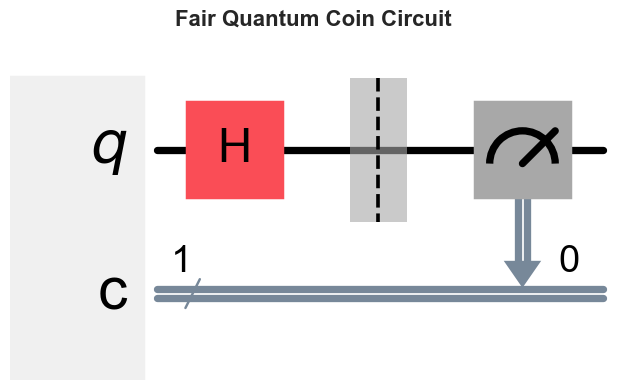

In [5]:
# Let's also create a beautiful visualization of our circuit
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
quantum_coin.draw(output='mpl', ax=ax, style={'backgroundcolor': '#f0f0f0'})
plt.title("Fair Quantum Coin Circuit", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


🧮 Understanding Quantum States Mathematically
Before we run our quantum coin, let's understand what's happening mathematically:

In [23]:
def explain_quantum_states():
    """
    Demonstrates the mathematical representation of our quantum coin states.
    """
    print("📊 Quantum State Analysis")
    print("=" * 50)
    
    # Initial state |0⟩
    initial_state = Statevector.from_label('0')
    print(f"Initial state |0⟩: {initial_state}")
    print(f"Probability amplitudes: {initial_state.data}")
    
    # Create circuit without measurement to see intermediate state
    qc_no_measure = QuantumCircuit(1)
    qc_no_measure.h(0)
    
    # Get the state after Hadamard gate
    superposition_state = initial_state.evolve(qc_no_measure)
    print(f"\nAfter Hadamard gate (superposition): {superposition_state}")
    print(f"Probability amplitudes: {superposition_state.data}")
    
    # Calculate probabilities - FIX: Access individual array elements!
    probabilities = superposition_state.probabilities()
    print(f"\nMeasurement probabilities:")
    print(f"P(|0⟩) = {probabilities[0]:.3f} = {probabilities[0]*100:.1f}%")
    print(f"P(|1⟩) = {probabilities[1]:.3f} = {probabilities[1]*100:.1f}%")
    
    # Additional mathematical explanation
    print(f"\n🔬 Mathematical Details:")
    print(f"Initial state: |ψ₀⟩ = |0⟩")
    print(f"After Hadamard: |ψ₁⟩ = (1/√2)|0⟩ + (1/√2)|1⟩")
    print(f"Amplitude for |0⟩: α = {superposition_state.data[0]:.6f}")
    print(f"Amplitude for |1⟩: β = {superposition_state.data[1]:.6f}")
    print(f"Normalization check: |α|² + |β|² = {abs(superposition_state.data[0])**2 + abs(superposition_state.data[1])**2:.6f}")
    print(f"√2 ≈ {np.sqrt(2):.6f}, so 1/√2 ≈ {1/np.sqrt(2):.6f}")
    
    return superposition_state

# Test the corrected function
superposition_state = explain_quantum_states()


📊 Quantum State Analysis
Initial state |0⟩: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Probability amplitudes: [1.+0.j 0.+0.j]

After Hadamard gate (superposition): Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Probability amplitudes: [0.70710678+0.j 0.70710678+0.j]

Measurement probabilities:
P(|0⟩) = 0.500 = 50.0%
P(|1⟩) = 0.500 = 50.0%

🔬 Mathematical Details:
Initial state: |ψ₀⟩ = |0⟩
After Hadamard: |ψ₁⟩ = (1/√2)|0⟩ + (1/√2)|1⟩
Amplitude for |0⟩: α = 0.707107+0.000000j
Amplitude for |1⟩: β = 0.707107+0.000000j
Normalization check: |α|² + |β|² = 1.000000
√2 ≈ 1.414214, so 1/√2 ≈ 0.707107


🎨 Visualizing the Quantum State: The Bloch Sphere
The Bloch sphere is a beautiful geometric representation of qubit states. Let's visualize our quantum coin before and after the Hadamard gate:

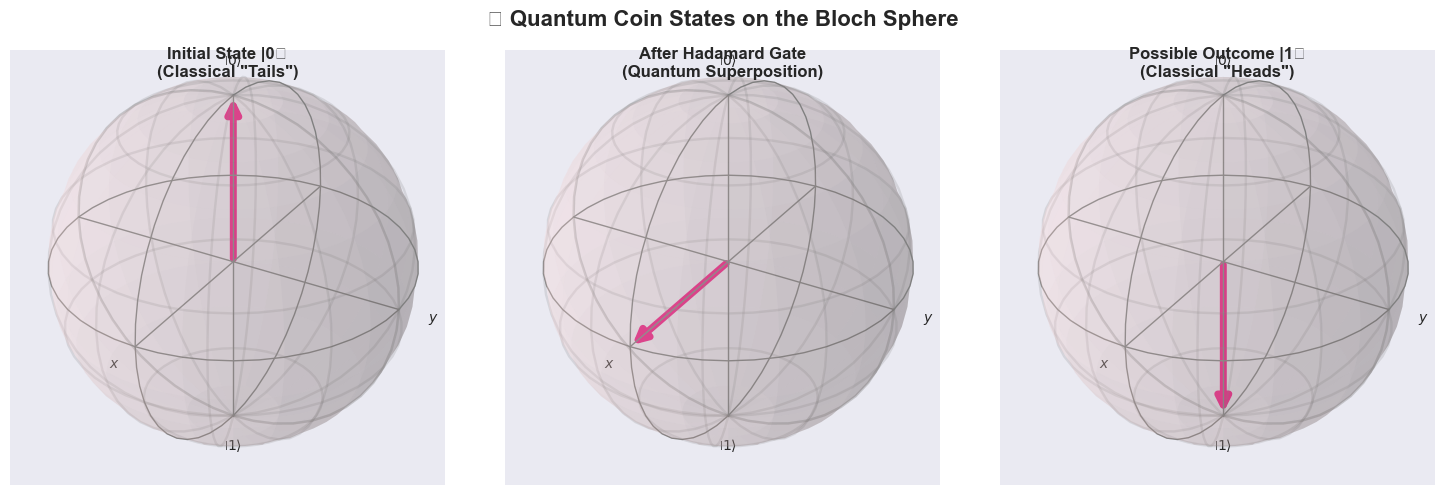

🧭 Bloch Sphere Guide:
• North Pole (0,0,1): |0⟩ state (Tails)
• South Pole (0,0,-1): |1⟩ state (Heads)
• Equator: Superposition states
• Our superposition is at (1,0,0) - equal probability for both outcomes!


In [24]:
def visualize_bloch_sphere():
    """
    Visualizes quantum states on the Bloch sphere.
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})
    
    # State |0⟩ (North pole) - FIX: Use axes[0] not axes
    plot_bloch_vector([0, 0, 1], ax=axes[0])
    axes[0].set_title('Initial State |0⟩\n(Classical "Tails")', fontsize=12, fontweight='bold')
    
    # Superposition state (Equator) - FIX: Use axes[1] not axes
    plot_bloch_vector([1, 0, 0], ax=axes[1])
    axes[1].set_title('After Hadamard Gate\n(Quantum Superposition)', fontsize=12, fontweight='bold')
    
    # State |1⟩ (South pole) - FIX: Use axes[2] not axes
    plot_bloch_vector([0, 0, -1], ax=axes[2])
    axes[2].set_title('Possible Outcome |1⟩\n(Classical "Heads")', fontsize=12, fontweight='bold')
    
    plt.suptitle('🌐 Quantum Coin States on the Bloch Sphere', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("🧭 Bloch Sphere Guide:")
    print("• North Pole (0,0,1): |0⟩ state (Tails)")
    print("• South Pole (0,0,-1): |1⟩ state (Heads)")  
    print("• Equator: Superposition states")
    print("• Our superposition is at (1,0,0) - equal probability for both outcomes!")

visualize_bloch_sphere()

## 🎲 Running Our Quantum Coin: Single Flip

Now let's flip our quantum coin once and see what happens:

In [8]:
def single_quantum_flip():
    """
    Performs a single quantum coin flip and displays the result.
    """
    # Create the circuit
    qc = create_fair_quantum_coin()
    
    # Set up the simulator
    simulator = AerSimulator()
    
    # Transpile and run
    pm = generate_preset_pass_manager(backend=simulator, optimization_level=1)
    transpiled_qc = pm.run(qc)
    
    # Run the circuit once
    job = simulator.run(transpiled_qc, shots=1)
    result = job.result()
    counts = result.get_counts()
    
    # Display result
    outcome = list(counts.keys())[0]
    print(f"🎲 Single Quantum Coin Flip Result: {outcome}")
    print(f"Interpretation: {'Heads (|1⟩)' if outcome == '1' else 'Tails (|0⟩)'}")
    
    return counts

print("Let's flip our quantum coin once:")
single_result = single_quantum_flip()

Let's flip our quantum coin once:
🎲 Single Quantum Coin Flip Result: 1
Interpretation: Heads (|1⟩)


## 📊 The Power of Statistics: Many Flips

The true beauty of quantum mechanics emerges when we perform many measurements. Let's flip our quantum coin 1000 times:

In [10]:
def many_quantum_flips(shots=1000):
    """
    Performs many quantum coin flips and analyzes the statistics.
    
    Args:
        shots (int): Number of times to run the quantum coin flip
    """
    # Create the circuit
    qc = create_fair_quantum_coin()
    
    # Set up the simulator
    simulator = AerSimulator()
    pm = generate_preset_pass_manager(backend=simulator, optimization_level=1)
    transpiled_qc = pm.run(qc)
    
    # Run the circuit many times
    job = simulator.run(transpiled_qc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    # Extract results
    tails_count = counts.get('0', 0)
    heads_count = counts.get('1', 0)
    
    print(f"🎲 Quantum Coin Flip Results ({shots} flips):")
    print(f"Tails (|0⟩): {tails_count} times ({tails_count/shots*100:.1f}%)")
    print(f"Heads (|1⟩): {heads_count} times ({heads_count/shots*100:.1f}%)")
    
    return counts

# Run 1000 quantum coin flips
many_results = many_quantum_flips(1000)

🎲 Quantum Coin Flip Results (1000 flips):
Tails (|0⟩): 492 times (49.2%)
Heads (|1⟩): 508 times (50.8%)


## 📈 Beautiful Visualization of Results

Let's create stunning visualizations of our quantum coin flip results:

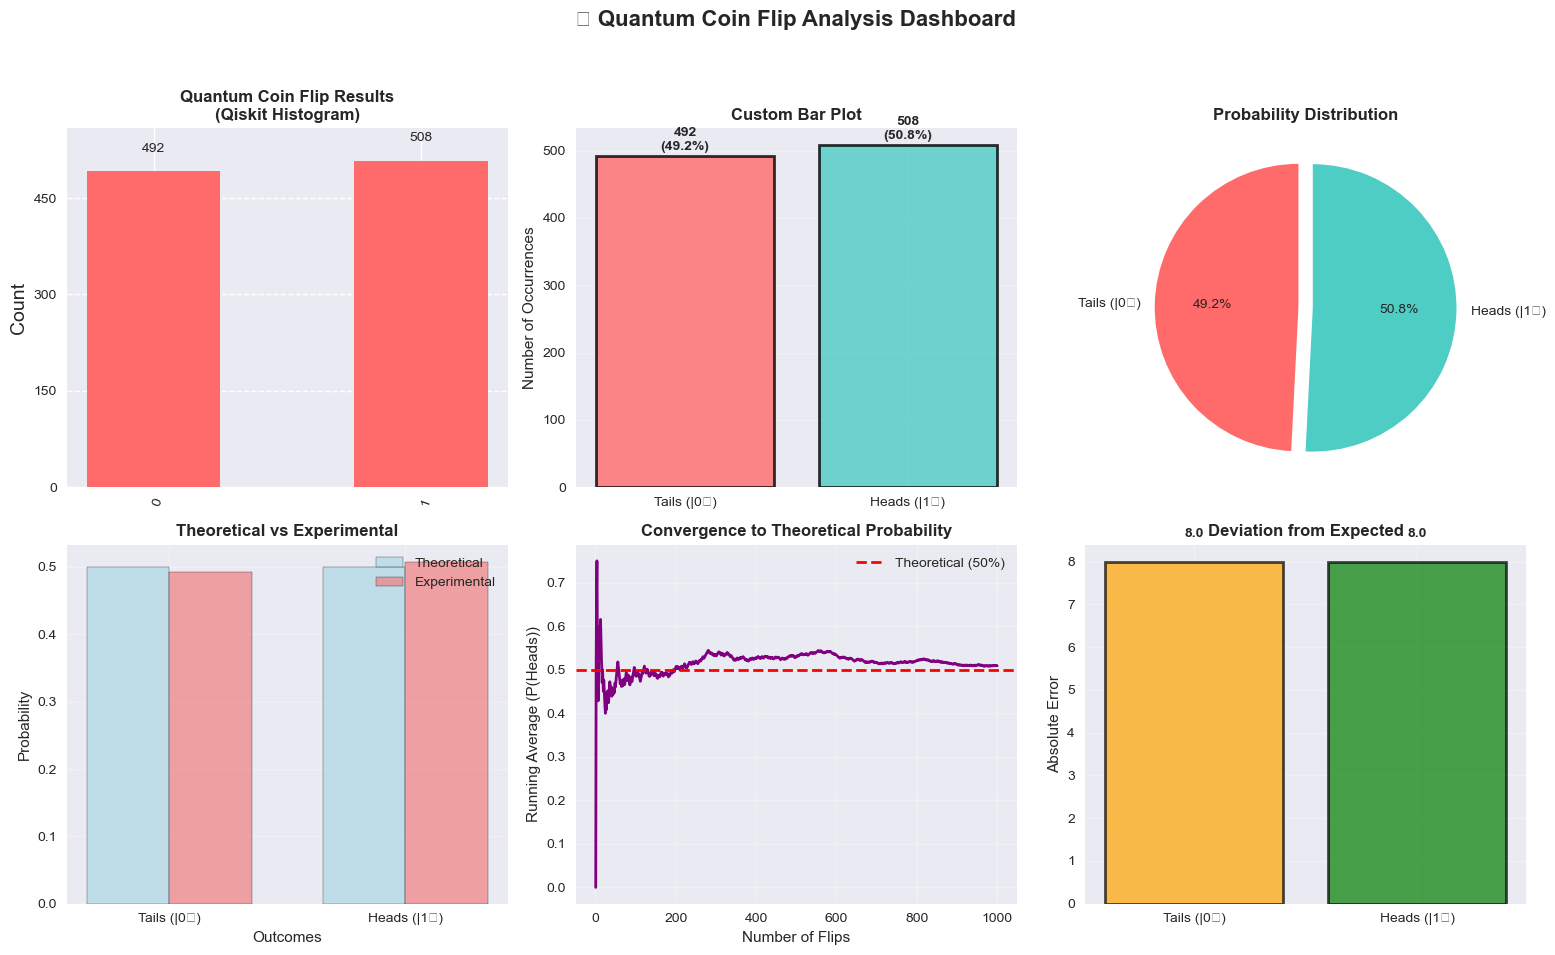

In [11]:
def create_beautiful_plots(counts, shots=1000):
    """
    Creates beautiful visualizations of quantum coin flip results.
    """
    # Prepare data
    outcomes = ['Tails (|0⟩)', 'Heads (|1⟩)']
    values = [counts.get('0', 0), counts.get('1', 0)]
    colors = ['#FF6B6B', '#4ECDC4']
    
    # Create subplots
    fig = plt.figure(figsize=(16, 10))
    
    # 1. Histogram using Qiskit's built-in function
    ax1 = plt.subplot(2, 3, 1)
    plot_histogram(counts, ax=ax1, color=colors)
    ax1.set_title('Quantum Coin Flip Results\n(Qiskit Histogram)', fontsize=12, fontweight='bold')
    
    # 2. Custom bar plot
    ax2 = plt.subplot(2, 3, 2)
    bars = ax2.bar(outcomes, values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
    ax2.set_title('Custom Bar Plot', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Number of Occurrences')
    ax2.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{value}\n({value/shots*100:.1f}%)',
                ha='center', va='bottom', fontweight='bold')
    
    # 3. Pie chart
    ax3 = plt.subplot(2, 3, 3)
    wedges, texts, autotexts = ax3.pie(values, labels=outcomes, colors=colors, 
                                      autopct='%1.1f%%', startangle=90,
                                      explode=(0.05, 0.05))
    ax3.set_title('Probability Distribution', fontsize=12, fontweight='bold')
    
    # 4. Theoretical vs Experimental comparison
    ax4 = plt.subplot(2, 3, 4)
    theoretical = [0.5, 0.5]
    experimental = [v/shots for v in values]
    
    x = np.arange(len(outcomes))
    width = 0.35
    
    bars1 = ax4.bar(x - width/2, theoretical, width, label='Theoretical', 
                   color='lightblue', alpha=0.7, edgecolor='black')
    bars2 = ax4.bar(x + width/2, experimental, width, label='Experimental', 
                   color='lightcoral', alpha=0.7, edgecolor='black')
    
    ax4.set_xlabel('Outcomes')
    ax4.set_ylabel('Probability')
    ax4.set_title('Theoretical vs Experimental', fontsize=12, fontweight='bold')
    ax4.set_xticks(x)
    ax4.set_xticklabels(outcomes)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Running average convergence
    ax5 = plt.subplot(2, 3, 5)
    
    # Simulate the running average (this is just for visualization)
    # In practice, you'd collect data sequentially
    np.random.seed(42)  # For reproducible results
    simulated_flips = np.random.choice([0, 1], size=shots, 
                                     p=[values[0]/shots, values[1]/shots])
    running_avg = np.cumsum(simulated_flips) / np.arange(1, shots + 1)
    
    ax5.plot(range(1, shots + 1), running_avg, color='purple', linewidth=2)
    ax5.axhline(y=0.5, color='red', linestyle='--', linewidth=2, 
               label='Theoretical (50%)')
    ax5.set_xlabel('Number of Flips')
    ax5.set_ylabel('Running Average (P(Heads))')
    ax5.set_title('Convergence to Theoretical Probability', fontsize=12, fontweight='bold')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Error analysis
    ax6 = plt.subplot(2, 3, 6)
    theoretical_counts = [shots/2, shots/2]
    errors = [abs(v - t) for v, t in zip(values, theoretical_counts)]
    
    bars = ax6.bar(outcomes, errors, color=['orange', 'green'], alpha=0.7, 
                  edgecolor='black', linewidth=2)
    ax6.set_title('Deviation from Expected', fontsize=12, fontweight='bold')
    ax6.set_ylabel('Absolute Error')
    ax6.grid(True, alpha=0.3)
    
    # Add error values on bars
    for bar, error in zip(bars, errors):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{error}', ha='center', va='bottom', fontweight='bold')
    
    plt.suptitle('🎨 Quantum Coin Flip Analysis Dashboard', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Create beautiful visualizations
create_beautiful_plots(many_results, 1000)

## 🔬 The Physics Behind the Magic: Wave-Particle Duality

Let's connect our quantum coin flip to real physics:

In [13]:
def physics_explanation():
    """
    Explains the physics concepts demonstrated by our quantum coin flip.
    """
    print("🔬 THE PHYSICS BEHIND QUANTUM COIN FLIPS")
    print("=" * 60)
    
    print("\n1. 🌊 WAVE-PARTICLE DUALITY:")
    print("   • Our qubit behaves like a WAVE in superposition")
    print("   • When measured, it behaves like a PARTICLE with definite state")
    print("   • This is exactly what happens with photons and electrons!")
    
    print("\n2. ⚡ SUPERPOSITION PRINCIPLE:")
    print("   • |ψ⟩ = α|0⟩ + β|1⟩  (α, β are complex probability amplitudes)")
    print("   • For our fair coin: |ψ⟩ = (1/√2)|0⟩ + (1/√2)|1⟩")
    print("   • |α|² + |β|² = 1  (normalization condition)")
    
    print("\n3. 🎯 MEASUREMENT & COLLAPSE:")
    print("   • Before measurement: qubit exists in ALL possible states")
    print("   • During measurement: wave function 'collapses' randomly")
    print("   • After measurement: qubit is in definite classical state")
    
    print("\n4. 🧪 REAL-WORLD ANALOGIES:")
    print("   • Electron spin in magnetic field (Stern-Gerlach)")
    print("   • Photon polarization through filters")
    print("   • Atomic energy levels in spectroscopy")
    
    print("\n5. 🤔 THE MEASUREMENT PROBLEM:")
    print("   • WHY does measurement cause collapse?")
    print("   • This is one of the deepest mysteries in physics!")
    print("   • Different interpretations: Copenhagen, Many-worlds, etc.")

physics_explanation()

🔬 THE PHYSICS BEHIND QUANTUM COIN FLIPS

1. 🌊 WAVE-PARTICLE DUALITY:
   • Our qubit behaves like a WAVE in superposition
   • When measured, it behaves like a PARTICLE with definite state
   • This is exactly what happens with photons and electrons!

2. ⚡ SUPERPOSITION PRINCIPLE:
   • |ψ⟩ = α|0⟩ + β|1⟩  (α, β are complex probability amplitudes)
   • For our fair coin: |ψ⟩ = (1/√2)|0⟩ + (1/√2)|1⟩
   • |α|² + |β|² = 1  (normalization condition)

3. 🎯 MEASUREMENT & COLLAPSE:
   • Before measurement: qubit exists in ALL possible states
   • During measurement: wave function 'collapses' randomly
   • After measurement: qubit is in definite classical state

4. 🧪 REAL-WORLD ANALOGIES:
   • Electron spin in magnetic field (Stern-Gerlach)
   • Photon polarization through filters
   • Atomic energy levels in spectroscopy

5. 🤔 THE MEASUREMENT PROBLEM:
   • WHY does measurement cause collapse?
   • This is one of the deepest mysteries in physics!
   • Different interpretations: Copenhagen, Many-w

## 🎛️ Interactive Exploration: Biased Quantum Coins

Let's explore what happens when we create biased quantum coins using different rotation angles:

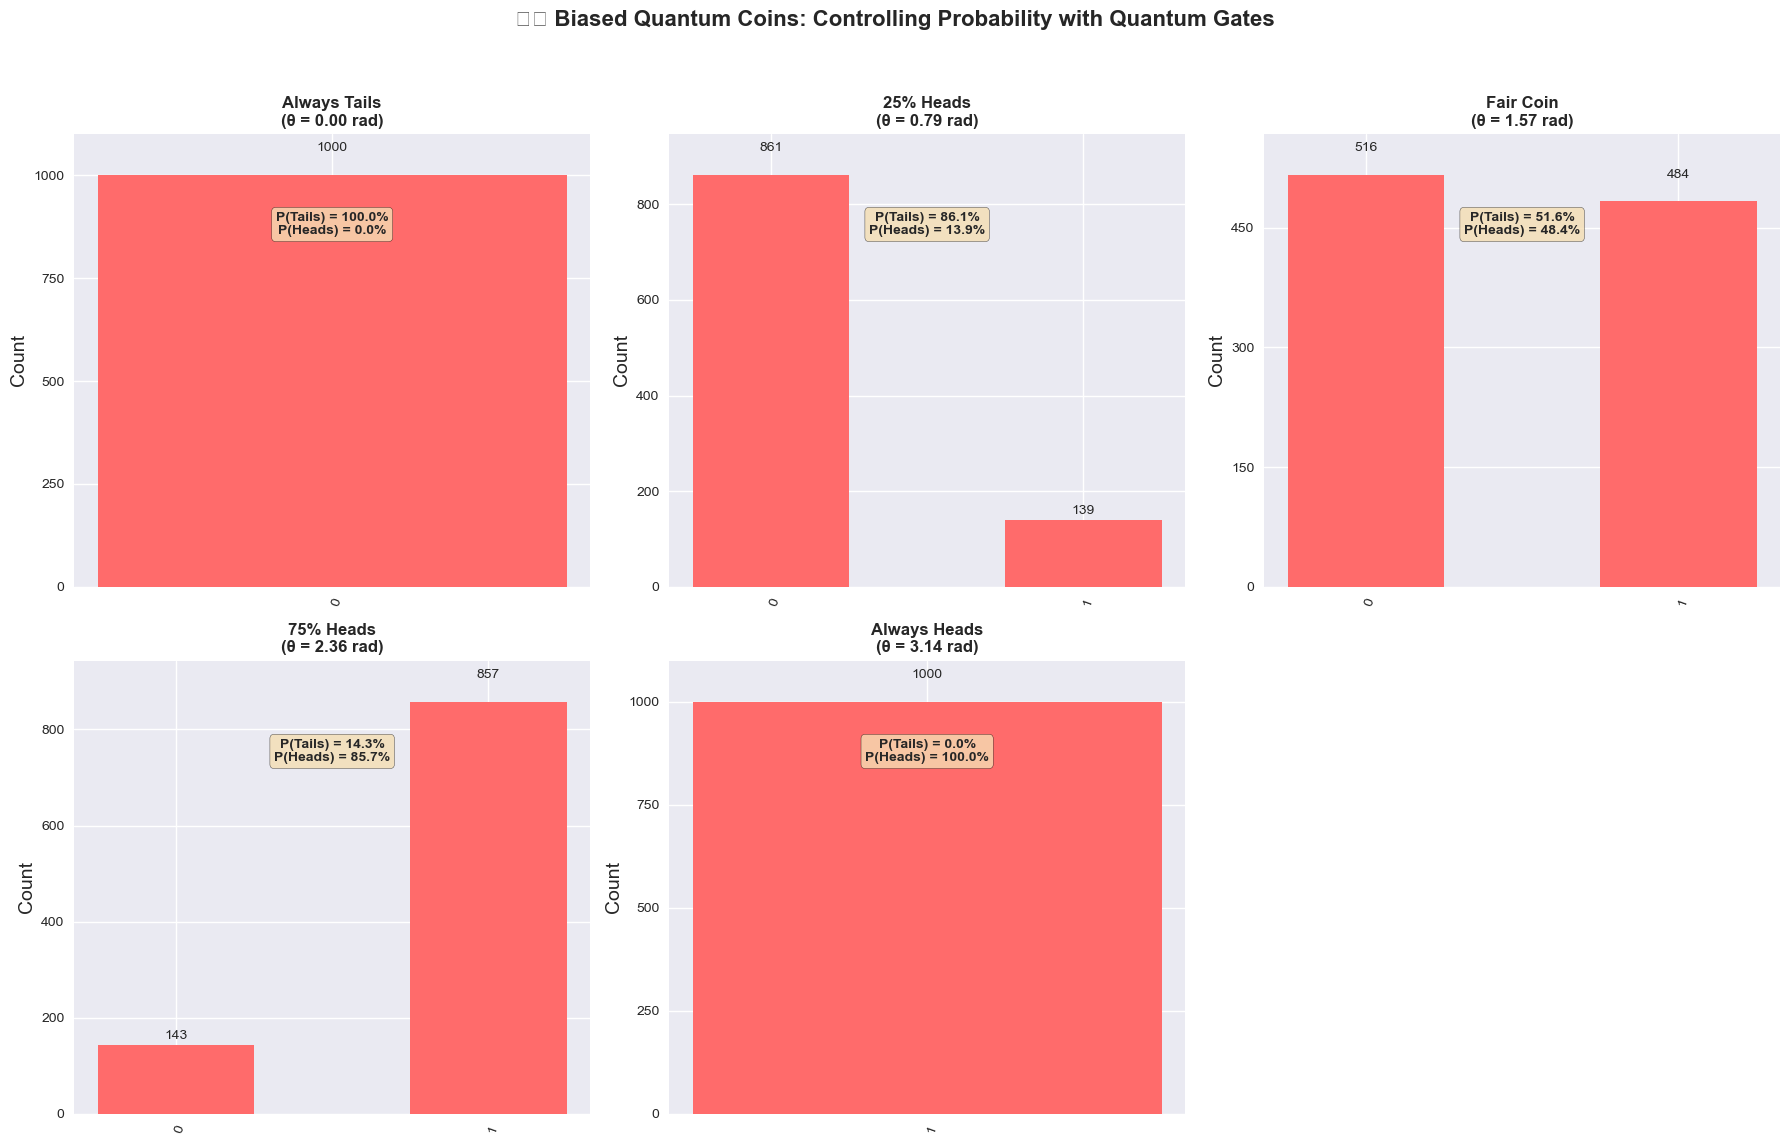

In [15]:
def create_biased_quantum_coin(bias_angle):
    """
    Creates a biased quantum coin using rotation gates.
    
    Args:
        bias_angle (float): Rotation angle in radians
                           0 = always tails, π/2 = fair coin, π = always heads
    """
    qc = QuantumCircuit(1, 1)
    
    # Use RY rotation to create bias
    # RY(θ) rotates qubit around Y-axis by angle θ
    qc.ry(bias_angle, 0)
    
    qc.barrier()
    qc.measure(0, 0)
    
    return qc

def analyze_biased_coins():
    """
    Analyzes quantum coins with different biases.
    """
    # Different bias angles
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
    angle_names = ['Always Tails', '25% Heads', 'Fair Coin', '75% Heads', 'Always Heads']
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    simulator = AerSimulator()
    
    for i, (angle, name) in enumerate(zip(angles, angle_names)):
        # Create biased coin
        qc = create_biased_quantum_coin(angle)
        
        # Run simulation
        pm = generate_preset_pass_manager(backend=simulator, optimization_level=1)
        transpiled_qc = pm.run(qc)
        result = simulator.run(transpiled_qc, shots=1000).result()
        counts = result.get_counts()
        
        # Plot results
        if i < len(axes):
            plot_histogram(counts, ax=axes[i], color=['#FF6B6B', '#4ECDC4'])
            axes[i].set_title(f'{name}\n(θ = {angle:.2f} rad)', fontweight='bold')
            
            # Calculate and display probabilities
            tails = counts.get('0', 0)
            heads = counts.get('1', 0)
            axes[i].text(0.5, 0.8, f'P(Tails) = {tails/1000:.1%}\nP(Heads) = {heads/1000:.1%}', 
                        transform=axes[i].transAxes, ha='center', va='center',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                        fontweight='bold')
    
    # Remove the last subplot (we only have 5 plots)
    axes[-1].remove()
    
    plt.suptitle('🎛️ Biased Quantum Coins: Controlling Probability with Quantum Gates', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

analyze_biased_coins()

## 🎯 Key Takeaways and Physical Insights

In [16]:
def summarize_lessons():
    """
    Summarizes the key lessons from our quantum coin flip exploration.
    """
    print("🎓 KEY TAKEAWAYS FROM QUANTUM COIN FLIPS")
    print("=" * 60)
    
    print("\n✅ QUANTUM CONCEPTS MASTERED:")
    print("   1. Qubits can exist in SUPERPOSITION of multiple states")
    print("   2. Quantum gates (like Hadamard) manipulate probability amplitudes")
    print("   3. Measurement collapses superposition to definite classical state")
    print("   4. Quantum randomness is fundamentally different from classical randomness")
    
    print("\n🔬 REAL PHYSICS CONNECTIONS:")
    print("   • Stern-Gerlach experiment → Quantum spin measurement")
    print("   • Double-slit experiment → Wave-particle duality")
    print("   • Atomic spectroscopy → Discrete energy levels")
    print("   • Quantum tunneling → Barrier penetration")
    
    print("\n🚀 PRACTICAL APPLICATIONS:")
    print("   • Quantum Random Number Generators")
    print("   • Quantum Cryptography (secure key distribution)")
    print("   • Quantum Machine Learning (quantum feature maps)")
    print("   • Quantum Error Correction (basis for fault-tolerant computing)")
    
    print("\n🎯 NEXT STEPS:")
    print("   • Multi-qubit systems and entanglement")
    print("   • Quantum algorithms (Grover, Shor)")
    print("   • Quantum error correction")
    print("   • Variational quantum algorithms")

summarize_lessons()

🎓 KEY TAKEAWAYS FROM QUANTUM COIN FLIPS

✅ QUANTUM CONCEPTS MASTERED:
   1. Qubits can exist in SUPERPOSITION of multiple states
   2. Quantum gates (like Hadamard) manipulate probability amplitudes
   3. Measurement collapses superposition to definite classical state
   4. Quantum randomness is fundamentally different from classical randomness

🔬 REAL PHYSICS CONNECTIONS:
   • Stern-Gerlach experiment → Quantum spin measurement
   • Double-slit experiment → Wave-particle duality
   • Atomic spectroscopy → Discrete energy levels
   • Quantum tunneling → Barrier penetration

🚀 PRACTICAL APPLICATIONS:
   • Quantum Random Number Generators
   • Quantum Cryptography (secure key distribution)
   • Quantum Machine Learning (quantum feature maps)
   • Quantum Error Correction (basis for fault-tolerant computing)

🎯 NEXT STEPS:
   • Multi-qubit systems and entanglement
   • Quantum algorithms (Grover, Shor)
   • Quantum error correction
   • Variational quantum algorithms


## 🏃‍♂️ Exercises for Further Exploration

Try these exercises to deepen your understanding:

In [17]:
def exercises():
    """
    Provides exercises for students to explore quantum concepts further.
    """
    print("💪 EXERCISES FOR PRACTICE")
    print("=" * 40)
    
    print("\n🔵 BEGINNER EXERCISES:")
    print("1. Modify the quantum coin to have 70% probability of heads")
    print("2. Create a quantum coin that always gives the same result")
    print("3. Plot how the measurement results change with different shot numbers")
    
    print("\n🟡 INTERMEDIATE EXERCISES:")
    print("4. Create a two-qubit system with independent quantum coins")
    print("5. Implement quantum coin flips using different gates (RX, RZ)")
    print("6. Compare quantum randomness with classical pseudorandom numbers")
    
    print("\n🔴 ADVANCED CHALLENGES:")
    print("7. Create entangled quantum coins (correlated outcomes)")
    print("8. Implement quantum coin flip with noise models")
    print("9. Design a quantum game using multiple biased coins")
    
    print("\n💡 RESEARCH QUESTIONS:")
    print("• How does decoherence affect quantum coin flips?")
    print("• Can you create quantum coins with complex probability patterns?")
    print("• How do quantum coins relate to quantum walks?")

exercises()

💪 EXERCISES FOR PRACTICE

🔵 BEGINNER EXERCISES:
1. Modify the quantum coin to have 70% probability of heads
2. Create a quantum coin that always gives the same result
3. Plot how the measurement results change with different shot numbers

🟡 INTERMEDIATE EXERCISES:
4. Create a two-qubit system with independent quantum coins
5. Implement quantum coin flips using different gates (RX, RZ)
6. Compare quantum randomness with classical pseudorandom numbers

🔴 ADVANCED CHALLENGES:
7. Create entangled quantum coins (correlated outcomes)
8. Implement quantum coin flip with noise models
9. Design a quantum game using multiple biased coins

💡 RESEARCH QUESTIONS:
• How does decoherence affect quantum coin flips?
• Can you create quantum coins with complex probability patterns?
• How do quantum coins relate to quantum walks?


## 🌟 Conclusion: Welcome to the Quantum World!